In [1]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt

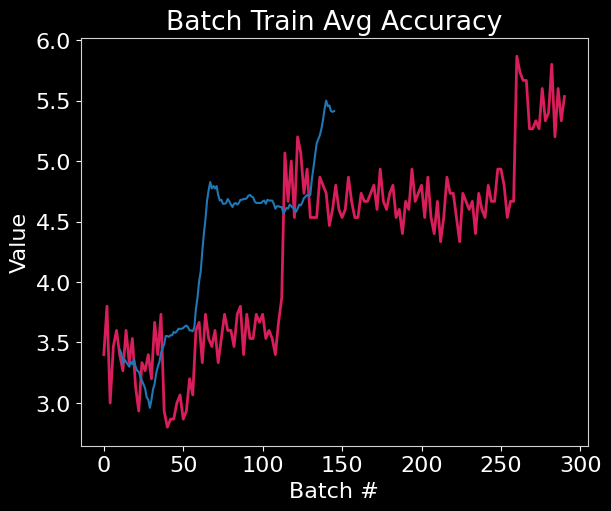

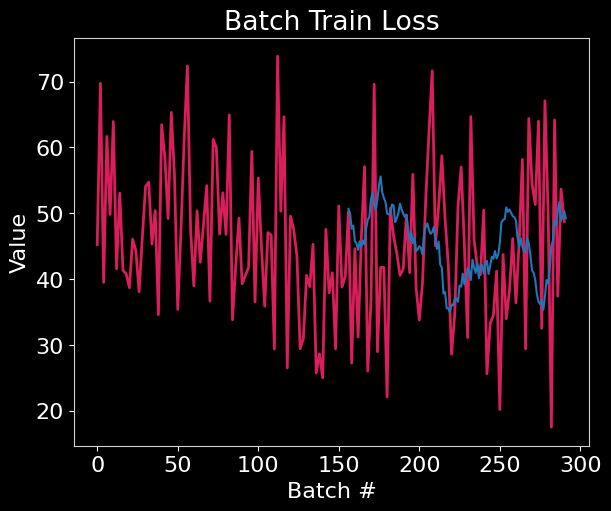

In [44]:
# load in a model output, this will change as we run the models
log_dir = '/home/jupyter/RNN/trained_models/20240720-202741/events.out.tfevents.1721507261.parmar-workbench.17710.0'

# change the figure parameters here so that we can just grab the output
# into our presentation

plt.rcParams['font.size'] = 16
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# read the model output
reader = SummaryReader(log_dir)
df = reader.scalars

# there are 4 different outputs from out model
# TODO: make this dynamic if needed
uniq_tags = df['tag'].unique()

# Make sure that y axis is the data plot and x is the epoch 
# the epoch we are at will be same for all, and is called
# by 'step' for each tag

window_size = 10

# plot all the data here
for i in range(len(uniq_tags)):
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), layout='constrained')
    y_data = df[(df['tag']) == uniq_tags[i]]['value']
    epoch_number = df[(df['tag']) == uniq_tags[i]]['step']
    ax1.plot(epoch_number, y_data, linewidth=2, color='#D81E5B')
    ax1.plot(y_data.rolling(window_size).mean().shift(1), label='moving avg')
    ax1.set_title(uniq_tags[i])
    ax1.set_xlabel('Batch #')
    ax1.set_ylabel('Value')
#     file_name = "model_output_" + "%s.png" % (uniq_tags[i].replace(" ", ""))
#     plt.savefig(file_name) # comment this if we don't want to save the plots and uncomment the next line
#     # plt.show()